In [63]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Unzip the dataset

In [64]:
#!unzip '/content/gdrive/MyDrive/Colab Notebooks/Hand_Written_Classification.zip'

Import the necessary libraries

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np

Loading Dataset Directory to acess the dataset

In [66]:
base_dir = r"/content/Hand_Written_Classification"

# Spliting the Dataset into train dataset and test dataset

We have total 10 alphabet of marrathi language each character has 200 images as dataset.

Overall we have 2000 images as dataset we have split it into train dataset and test dataset.

Train dataset contains 80 percentage of the dataset.

Test data contains the 20 percentage of the dataset


## Data preparation - cleansing and preparing data for the next steps of model development

In [67]:
IMAGE_SIZE=224
BATCH_SIZE=64

#Loading Custom image dataset and Preprocess it
train=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )

test=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.2
)

train=train.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test=test.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 7872 images belonging to 48 classes.
Found 1968 images belonging to 48 classes.


### Training and testing the dataset into X_train,X_test, y_train and y_test

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(test,test,test_size=0.2)

### Building Convolutional Neural Networks

In [69]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(48,activation='softmax')) #Activation function sigmoid is used to get accuracy

In [70]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [83]:
r=cnn.fit(train,epochs=50,validation_data=test)

Epoch 1/50
123/123 [==============================] - 271s 2s/step - loss: 3.2695 - accuracy: 0.1485 - val_loss: 2.7789 - val_accuracy: 0.2520
Epoch 2/50
123/123 [==============================] - 257s 2s/step - loss: 2.3557 - accuracy: 0.3413 - val_loss: 2.3142 - val_accuracy: 0.3577
Epoch 3/50
123/123 [==============================] - 262s 2s/step - loss: 1.9502 - accuracy: 0.4365 - val_loss: 2.0432 - val_accuracy: 0.4228
Epoch 4/50
123/123 [==============================] - 268s 2s/step - loss: 1.7251 - accuracy: 0.5067 - val_loss: 1.9566 - val_accuracy: 0.4339
Epoch 5/50
123/123 [==============================] - 262s 2s/step - loss: 1.5908 - accuracy: 0.5373 - val_loss: 1.8065 - val_accuracy: 0.4898
Epoch 6/50
123/123 [==============================] - 264s 2s/step - loss: 1.4463 - accuracy: 0.5788 - val_loss: 1.6905 - val_accuracy: 0.5132
Epoch 7/50
123/123 [==============================] - 261s 2s/step - loss: 1.3712 - accuracy: 0.5971 - val_loss: 1.6307 - val_accuracy: 0.5330

In [84]:
train_loss, train_acc = cnn.evaluate_generator(train, steps= 16)
val_loss, val_acc = cnn.evaluate_generator(test, steps= 16)
print('Train accuracy : %.3f, Test accuracy : %.3f' % (train_acc,val_acc))

<ipython-input-84-fce72b911000>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_loss, train_acc = cnn.evaluate_generator(train, steps= 16)
<ipython-input-84-fce72b911000>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  val_loss, val_acc = cnn.evaluate_generator(test, steps= 16)


Train accuracy : 0.824, Test accuracy : 0.713


In [85]:
cnn.save_weights('/content/gdrive/MyDrive/Colab Notebooks/CNN.h5')

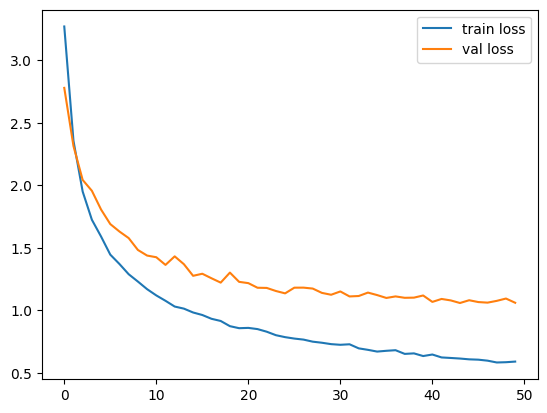

In [86]:
import matplotlib.pyplot as plt

#plot the loss
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

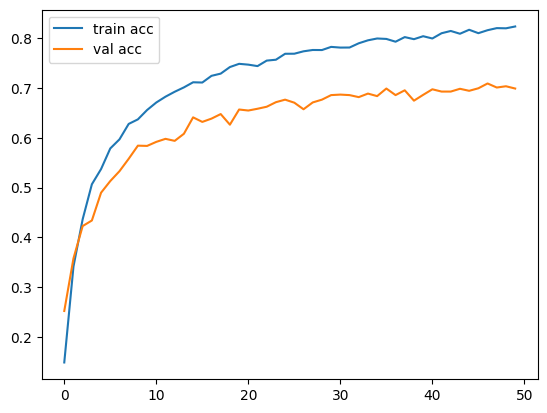

In [87]:
#plot the accuracy
plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
#plt.savefig('Actual_acc')